## Problem1

A psychological study has been conducted by a team of students at a university on married couples to determine the cause of having an extra marital affair. They have surveyed and collected a sample of data on which they would like to do further analysis. Apply Logistic Regression on the data to correctly classify whether a given person will have an affair or not given the set of attributes. Convert the naffairs column to discrete binary type before proceeding with the algorithm.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

#Importing Data
data = pd.read_csv("Affairs.csv", sep = ",")


In [2]:
data.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [3]:
data.shape

(601, 19)

In [4]:
data.naffairs.value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: naffairs, dtype: int64

In [5]:
#removing CASENUM
c1 = data.drop('Unnamed: 0', axis = 1)

In [6]:
c1.head(10)

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,7,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [7]:
c1.shape

(601, 18)

In [8]:
c1["naffairs"] = np.where(c1["naffairs"] > 0, 1, 0)

In [9]:
c1.head(10)

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [10]:
c1.shape


(601, 18)

In [11]:
c1.naffairs.value_counts()

0    451
1    150
Name: naffairs, dtype: int64

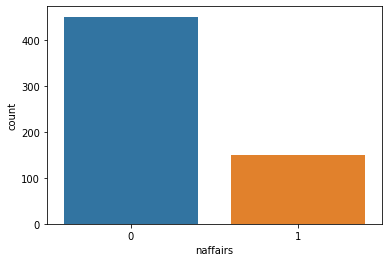

In [12]:

 
# count plot on single categorical variable
sns.countplot(x ='naffairs', data = c1)
 
# Show the plot
plt.show()

In [13]:
c1.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,0.433133,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
c1.isna().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
dtype: int64

In [15]:
c1.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [16]:
c1.corr()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
naffairs,1.000000,0.133605,0.095694,0.203235,0.040277,-0.003448,-0.188775,0.113744,0.000589,0.101169,-0.119244,-0.053584,-0.109111,-0.108355,0.008036,0.028384,0.042297,0.090004
kids,0.133605,1.000000,0.035564,0.127133,0.025094,0.119876,-0.227176,-0.045474,-0.110424,0.015304,0.071857,0.068019,-0.369977,-0.427288,-0.059484,0.132481,0.148491,0.389742
vryunhap,0.095694,0.035564,1.000000,-0.058087,-0.070761,-0.114179,-0.131133,-0.010595,0.014710,0.014242,-0.023525,0.004396,-0.050898,-0.068496,-0.021650,-0.005511,-0.060046,0.143393
unhap,0.203235,0.127133,-0.058087,1.000000,-0.150281,-0.242493,-0.278500,-0.044586,0.071563,0.023767,-0.044239,-0.027989,-0.089167,-0.025047,-0.091528,0.108448,-0.044579,0.096623
avgmarr,0.040277,0.025094,-0.070761,-0.150281,1.000000,-0.295402,-0.339266,-0.041200,-0.003901,0.022840,0.005927,0.002410,0.015602,-0.047075,-0.015120,0.004170,0.002410,0.033352
hapavg,-0.003448,0.119876,-0.114179,-0.242493,-0.295402,1.000000,-0.547437,0.019768,-0.015487,-0.005553,0.020427,-0.017702,-0.022600,-0.124884,0.010370,-0.015233,0.071048,0.061251
vryhap,-0.188775,-0.227176,-0.131133,-0.278500,-0.339266,-0.547437,1.000000,0.043760,-0.033053,-0.031608,0.012169,0.031732,0.084210,0.193641,0.067214,-0.056296,-0.021539,-0.193068
antirel,0.113744,-0.045474,-0.010595,-0.044586,-0.041200,0.019768,0.043760,1.000000,-0.180484,-0.154022,-0.200315,-0.106969,-0.003342,-0.000491,0.123074,-0.027700,-0.030435,-0.055645
notrel,0.000589,-0.110424,0.014710,0.071563,-0.003901,-0.015487,-0.033053,-0.180484,1.000000,-0.320262,-0.416521,-0.222425,0.063914,0.126652,-0.016254,0.017672,0.022107,-0.147259
slghtrel,0.101169,0.015304,0.014242,0.023767,0.022840,-0.005553,-0.031608,-0.154022,-0.320262,1.000000,-0.355451,-0.189813,-0.016742,0.012741,0.079645,-0.030705,-0.025582,-0.023853


<AxesSubplot:>

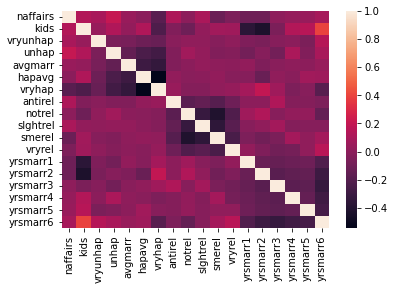

In [17]:
# check correlations in train data with a heatmap
sns.heatmap(c1.corr())

In [18]:
c1.var()

naffairs    0.187604
kids        0.203910
vryunhap    0.025957
unhap       0.097920
avgmarr     0.131015
hapavg      0.218963
vryhap      0.237404
antirel     0.073611
notrel      0.198747
slghtrel    0.168852
smerel      0.216556
vryrel      0.103078
yrsmarr1    0.079168
yrsmarr2    0.125191
yrsmarr3    0.144426
yrsmarr4    0.118020
yrsmarr5    0.103078
yrsmarr6    0.224592
dtype: float64

In [19]:
c1.dtypes

naffairs    int32
kids        int64
vryunhap    int64
unhap       int64
avgmarr     int64
hapavg      int64
vryhap      int64
antirel     int64
notrel      int64
slghtrel    int64
smerel      int64
vryrel      int64
yrsmarr1    int64
yrsmarr2    int64
yrsmarr3    int64
yrsmarr4    int64
yrsmarr5    int64
yrsmarr6    int64
dtype: object

In [20]:
c1[c1.duplicated()]

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
9,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
20,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
24,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
27,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
29,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
596,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
599,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


### Visualizations

In [21]:
c1.naffairs.value_counts()

0    451
1    150
Name: naffairs, dtype: int64

In [22]:
150/451 # 33% negative 

0.3325942350332594

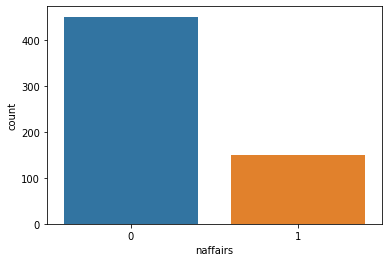

In [23]:
sns.countplot(x ='naffairs', data = c1)
plt.show()

In [24]:
c1.drop_duplicates(keep='first',inplace= True)

In [133]:
c1.shape

(223, 18)

In [134]:
c1.naffairs.value_counts()

0    133
1     90
Name: naffairs, dtype: int64

In [135]:
90/133

0.6766917293233082

In [161]:
c1.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [25]:
c1.shape

(223, 18)

In [26]:
c1.iloc[:,1:].columns

Index(['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [27]:
c1.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


Text(0, 0.5, 'count')

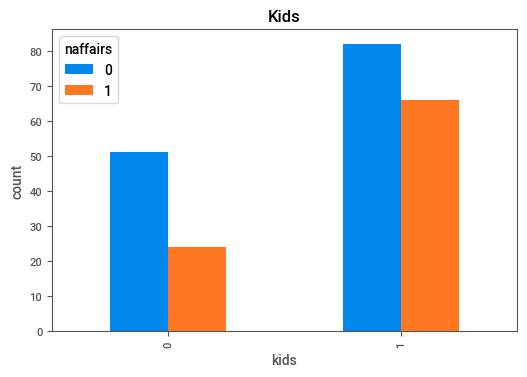

In [147]:
pd.crosstab(c1.kids,c1.naffairs).plot(kind='bar')
plt.title('Kids')
plt.ylabel('count')

Text(0, 0.5, 'Proportion of affairs')

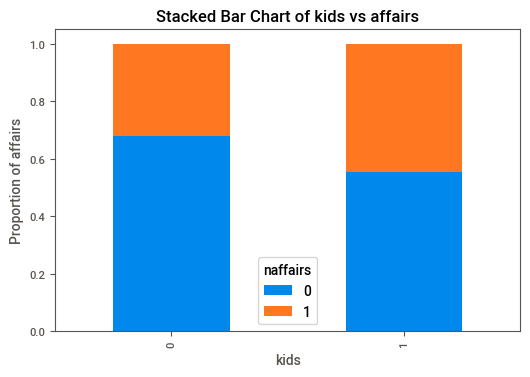

In [151]:
table=pd.crosstab(c1.kids,c1.naffairs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of kids vs affairs')
plt.xlabel('kids')
plt.ylabel('Proportion of affairs')

Text(0, 0.5, 'Proportion of affairs')

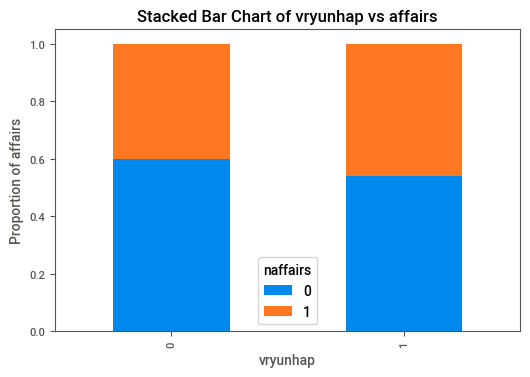

In [152]:
table=pd.crosstab(c1.vryunhap,c1.naffairs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of vryunhap vs affairs')
plt.xlabel('vryunhap')
plt.ylabel('Proportion of affairs')

Text(0, 0.5, 'Proportion of affairs')

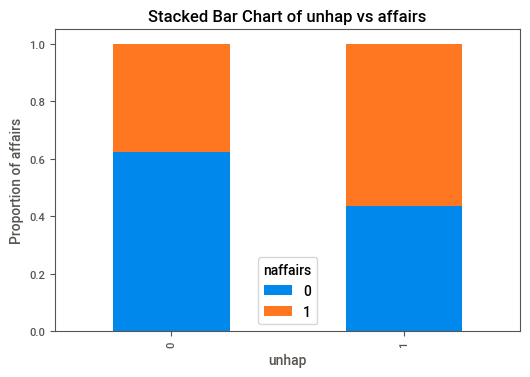

In [154]:
table=pd.crosstab(c1.unhap,c1.naffairs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of unhap vs affairs')
plt.xlabel('unhap')
plt.ylabel('Proportion of affairs')

Text(0, 0.5, 'Proportion of affairs')

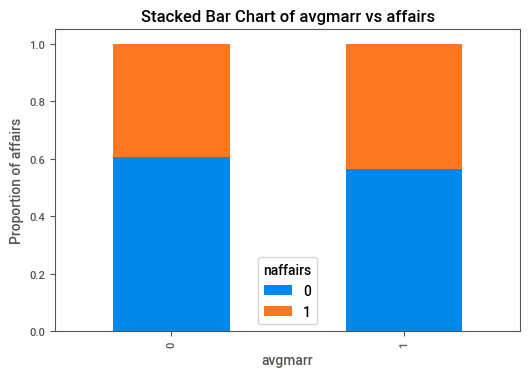

In [155]:
table=pd.crosstab(c1.avgmarr,c1.naffairs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of avgmarr vs affairs')
plt.xlabel('avgmarr')
plt.ylabel('Proportion of affairs')

In [28]:
c1.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [29]:
X = c1.iloc[:,1:]
y = c1.iloc[:,0]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Classifier

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


RF train roc-auc: 0.917989417989418
RF test roc-auc: 0.17546296296296296


### Logistic Classifier

In [56]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_logistic = log_classifier.decision_function(X_test)

Logistic train roc-auc: 0.6836490868748932
Logistic test roc-auc: 0.5199074074074075


### Adaboost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_adaboost = ada_classifier.decision_function(X_test)

Adaboost train roc-auc: 0.6817716333845367
Adaboost test roc-auc: 0.513425925925926


### KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('knn train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('knn test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

knn train roc-auc: 0.7114695340501792
knn test roc-auc: 0.36296296296296293


### SVM Classifier

In [64]:
from sklearn.svm import SVC
model_SVC=SVC(kernel = 'rbf', random_state = 4,probability=True)
model_SVC.fit(X_train, y_train)
ytrain_pred = model_SVC.predict_proba(X_train)
print('svm train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model_SVC.predict_proba(X_test)
print('svm test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_pred_svm = model_SVC.decision_function(X_test)

svm train roc-auc: 0.18339307048984468
svm test roc-auc: 0.6532407407407407


In [31]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

### Ensemble

In [68]:
pred=[]
for model in [log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.5189814814814815


### Get the optimum threshold and plot ROC curve

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.60060672, 0.60060672, 0.5554409 , 0.55106994, 0.53970246,
       0.53480432, 0.5231746 , 0.51373734, 0.49581092, 0.49498904,
       0.48913062, 0.48563357, 0.45559368, 0.45542185, 0.45032572,
       0.44818436, 0.44495906, 0.44271551, 0.43639293, 0.43056569,
       0.42915448, 0.4253246 , 0.42105282, 0.41738761, 0.4153313 ,
       0.412074  , 0.40900008, 0.40194771, 0.3913317 , 0.39034465,
       0.37908571, 0.37688026, 0.37638062, 0.36112149, 0.34885288,
       0.33976986, 0.3342124 , 0.31981367, 0.29104718])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
3,0.551070,0.611940
7,0.513737,0.611940
8,0.495811,0.611940
0,1.600607,0.597015
2,0.555441,0.597015


We choose the threshold 0.55 with accuracy of 0.611940

In [72]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.5591397849462365


In [80]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label=' ROC ensemble (auc = %0.3f)' % auc_ensemble)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

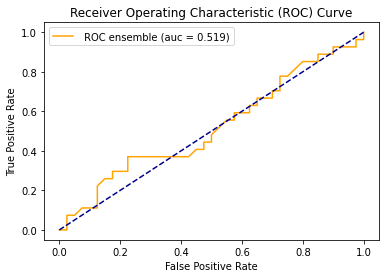

In [81]:
plot_roc_curve(fpr,tpr)